# Interpolation

## 1. Bilinear

Links used:
1) https://www.geeksforgeeks.org/what-is-bilinear-interpolation/

In [50]:
import numpy as np

# F -- 2D array of function values
# x1, x2, y1, y2 -- points of known function values
# x, y -- point to interpolate in
def bilinear_interpolation(F, x, y, x1, x2, y1, y2):
    Q11 = F(x1, y1)
    Q12 = F(x1, y2)
    Q21 = F(x2, y1)
    Q22 = F(x2, y2)

    F_int = 1 / (x2 - x1) / (y2 - y1) * ((x2 - x) * (y2 - y) * Q11 + (x - x1) * (y2 - y) * Q21 + (x2 - x) * (y - y1) * Q12 + (x - x1) * (y - y1) * Q22)

    return F_int

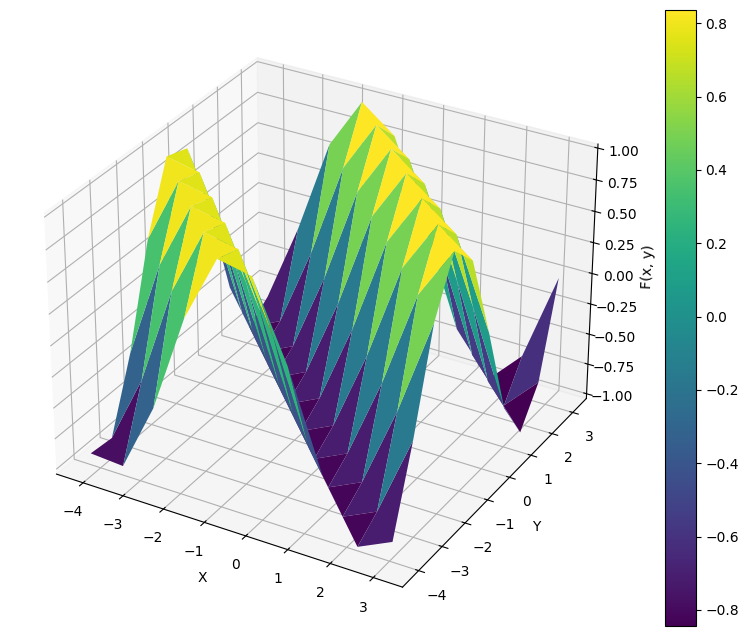

Interpolated value: F(0, 0) = -0.01322892032673778


In [ ]:
# TEST
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def F(x, y):
    return np.sin(x + y)

x = np.linspace(-np.pi - 1, np.pi, 10)
y = np.linspace(-np.pi - 1, np.pi, 10)

X, Y = np.meshgrid(x, y)
Z = F(X, Y)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('F(x, y)')
fig.colorbar(surf)
plt.show()

x1, x2, y1, y2 = x[5], x[6], y[5], y[6]
x_int, y_int = 0, 0

F_int = bilinear_interpolation(F, x_int, y_int, x1, x2, y1, y2)
print('Interpolated value: F({}, {}) = {}'.format(x_int, y_int, F_int))